<a href="https://colab.research.google.com/github/plaban1981/Auto-Sklearn/blob/master/TreebasedPipelineOptimizationTechnique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Cost Prediction using TPOT

In [22]:
pip install tpot

     |████████████████████████████████| 81kB 2.3MB/s 
     |████████████████████████████████| 163kB 8.3MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=e7329960c14e7b3b13ab770d1c665adf014353c3e33838f2a2533896def955f0
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()

Saving medical_insurance_cost_prediction.zip to medical_insurance_cost_prediction.zip


{'medical_insurance_cost_prediction.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00d\x8b}O\xe7d\xc0\x82\xb1?\x00\x00L\xd9\x00\x00\r\x00\x00\x00insurance.csv\x85}\xdb\xae-\xbb\x8d\xdd\xbb\x81\xf5\'\x1b\x05\x89\xa2n\x9f\xe3$;n#\xdd6\xe0\xd3A\x92\xbf\x0f\x07\xa5*Q\xa2\xdc\xf6\xe3q\xedZ\xb3$^\x06\xc9A\xf2\xcf\x7f\xf9\xfd\xeb\x8f\xdf\xff\xf7\xd7\x7f\xfb\x8f\xbf\xfe\xfa\xef\xff\xf6\xd7\x7f\xff\x1f\xff\xf8\xfd\xb7_\x7f\xfc\xc7\xdf\xff\xd7\xef\x7f\xfc\xfa\xc7\xef\xbf\xfc\xf5\xef\x7f\x93\xff\xfc\xe7\x7f\xfc\xe5\xf7\x1f?\x7f\x8a\xfd\xd7\xff\xfc\xfd\x1f\x7f\xfe\xf7\xdf\xbf\xa8>\xfdW\xf8\xf5\xff~\xff\xf1\xeb\x8f\xbf\xff\xef\xff\xfc\xb7\xff\xf3\xfb\x8f\xff\xfc\x15Kk\xfctby\xb2\xfd\xd2\xe7Rzj\xfd\x15\x7f\xfd\xed\xef\xe3\xb9\xdf\x7f\xc6s\x95\xf2\x933\xa5\x9f?\xd1\xf7\xdc\xaf\xb4?\xc4\xcc\xfd\xe1B?\x7f\x92\xffo\xfcMzj\xc8\xf2W\xe5\xb9\xbf\xfd\xfd\x1f\xf3\x8fR\xec\xf2G\xb9\x86\x12\xe5Q\x9a\x8f\xb6\xa7\xb5\xf3\xc9\xd4Jy\x9a\xfc]y.~\x1f\x92\x9f\xca\xe3\xc9\xf5\xb7S\xcd\xe5)\x14\xcb\xcf\x9f\xb8\xbcO\xca\xa70\x

In [3]:
!unzip medical_insurance_cost_prediction.zip


Archive:  medical_insurance_cost_prediction.zip
  inflating: insurance.csv           
  inflating: medical_insurance_cost_prediction.ipynb  


In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


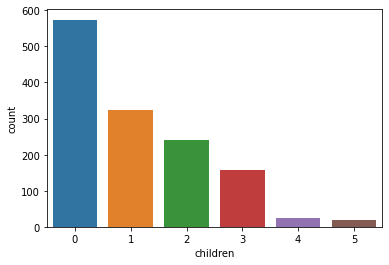

In [8]:
sns.countplot(x='children',data=df)

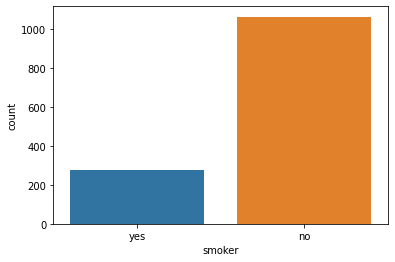

In [9]:
sns.countplot('smoker',data=df)

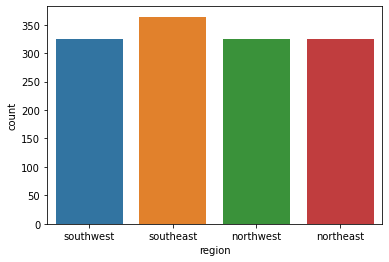

In [10]:
sns.countplot('region',data=df)

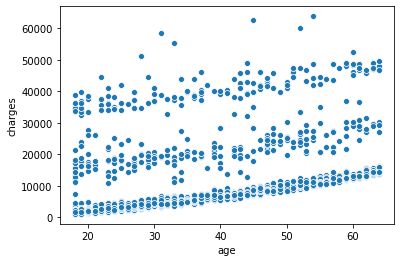

In [11]:
sns.scatterplot('age','charges',data=df)

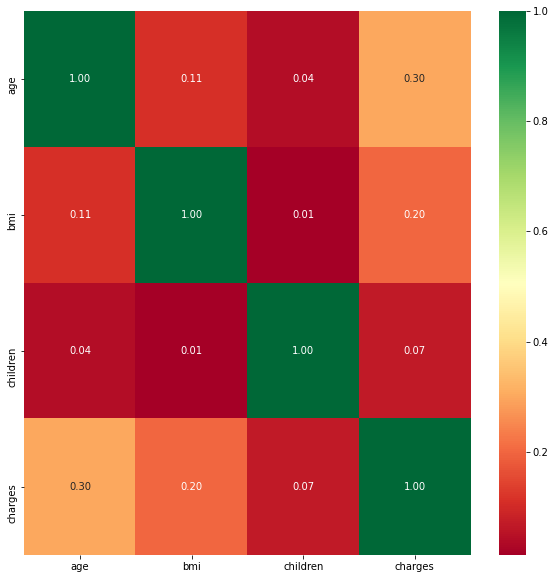

In [13]:
#CORRELATION HEATMAP
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_features].corr(),annot= True,fmt='.2f',cmap='RdYlGn')



# Label Encoding

In [0]:
def smoker(yes):
  if yes == 'yes':
    return 1
  else:
    return 0
df['smoker'] = df['smoker'].apply(smoker)

def sex(s):
  if s == 'Male':
    return 1
  else:
    return 0

df['sex'] = df['sex'].apply(sex)

Separate X and Y from the dataset

In [17]:
X = df.drop(['charges','region'],axis=1)
Y = df['charges']
print(X.shape)
print(Y.shape)

(1338, 5)
(1338,)


# Train Test Split data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
print(X_train.shape)
print(X_test.shape)

(1070, 5)
(268, 5)


# Build the Model

In [0]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
tpot = TPOTRegressor(generations=25,population_size=100,verbosity=2,random_state=42,max_time_mins=5,max_eval_time_mins=2)

In [27]:
tpot.fit(X_train,y_train)

Generation 1 - Current best internal CV score: -20200993.86593699
Generation 2 - Current best internal CV score: -20200993.86593699

5.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(AdaBoostRegressor(input_matrix, learning_rate=0.5, loss=linear, n_estimators=100), bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=6, min_samples_split=18, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=25,
              max_eval_time_mins=2, max_time_mins=5, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=42, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [0]:
y_pred = tpot.predict(X_test)

In [29]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4850.797024029618


In [30]:
print(r2_score(y_test,y_pred))

0.8466223077823078


## Red Wine Classification problem

In [31]:
from google.colab import files
files.upload()

Saving Red_wine_quality_classification.zip to Red_wine_quality_classification.zip


{'Red_wine_quality_classification.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x006\xa4}O\xc6\x9e\x82\xeb\xec\xd6\x01\x00\xa3\xdf\x02\x00%\x00\x00\x00Red_wine_quality_classification.ipynb\xec\\i\x93\xdb\xb6\xb2\xfd~\x7f\x05k^\xbd\xb2\x93\xb1(\xee\x8b\xaf\x93*J\xa2$j\xdf\xb7(\xe5\xe2\x02J\x94H\x90CRk\xca\xff\xfd\x81\x9c\xd16\xa3\x19Cv\x92\x9bz\xd7*{L\x00\xdd\x8dF\xf7\xc1\x01\x01h\xfc\xc7\xbf\x08\xe2\x0e\x1a\xb6\x1fzz|\xf7\x91\xe0>\x9cW|\xf6\x1c\xe8\x87\xa8\x9aJ\xab=\x10\xeb\x96\x1e\xeb\xa8\xe2\x0fTF5\xa6\xef\xea\xc6\xb1\x98h\xea\x1e@\xe5\xbb\x0e\xb0\x88\x8d\x03\x01\xf1\xb0\xd2]\'\xde\x11\xa6\xabG\x91c;\xa6\x1e;>$\x9d`\x07\x8d\xbb\x0f\x07\xb5 \xf4\xd7\x00\xea\xd0L\x94\x7f\xfb\xfdX\x8f\xec\xbbz\x10\x01\xebs\x04\xccD1J\xdb\xd3\xe6/\x8fRwK\x10B\xe0F\x010\xaf9\x12\xec\xe2\xb9\x0f\xd9SW\x96\x13\x05\xae\xbe\xfb|\x10h\xa5\x02\x04{\xf7h\xf4_O\x86\xefL\xe0\xbaioi\xfd\xd1nR\xfd9\xde\x05\xa9\xae\xa7\x87K\xcb\xdf\xc0\x93\xf5\x17!Jk\x1d+\x91\xcel+\xbd\xe6\xba\xa6\x18vC>j\x1c\x82x\xb4\x19\x83m|\xf7\xd4\xf8\

In [32]:
!unzip Red_wine_quality_classification.zip

Archive:  Red_wine_quality_classification.zip
  inflating: Red_wine_quality_classification.ipynb  
  inflating: winequality-red.csv     


In [33]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


data visualization

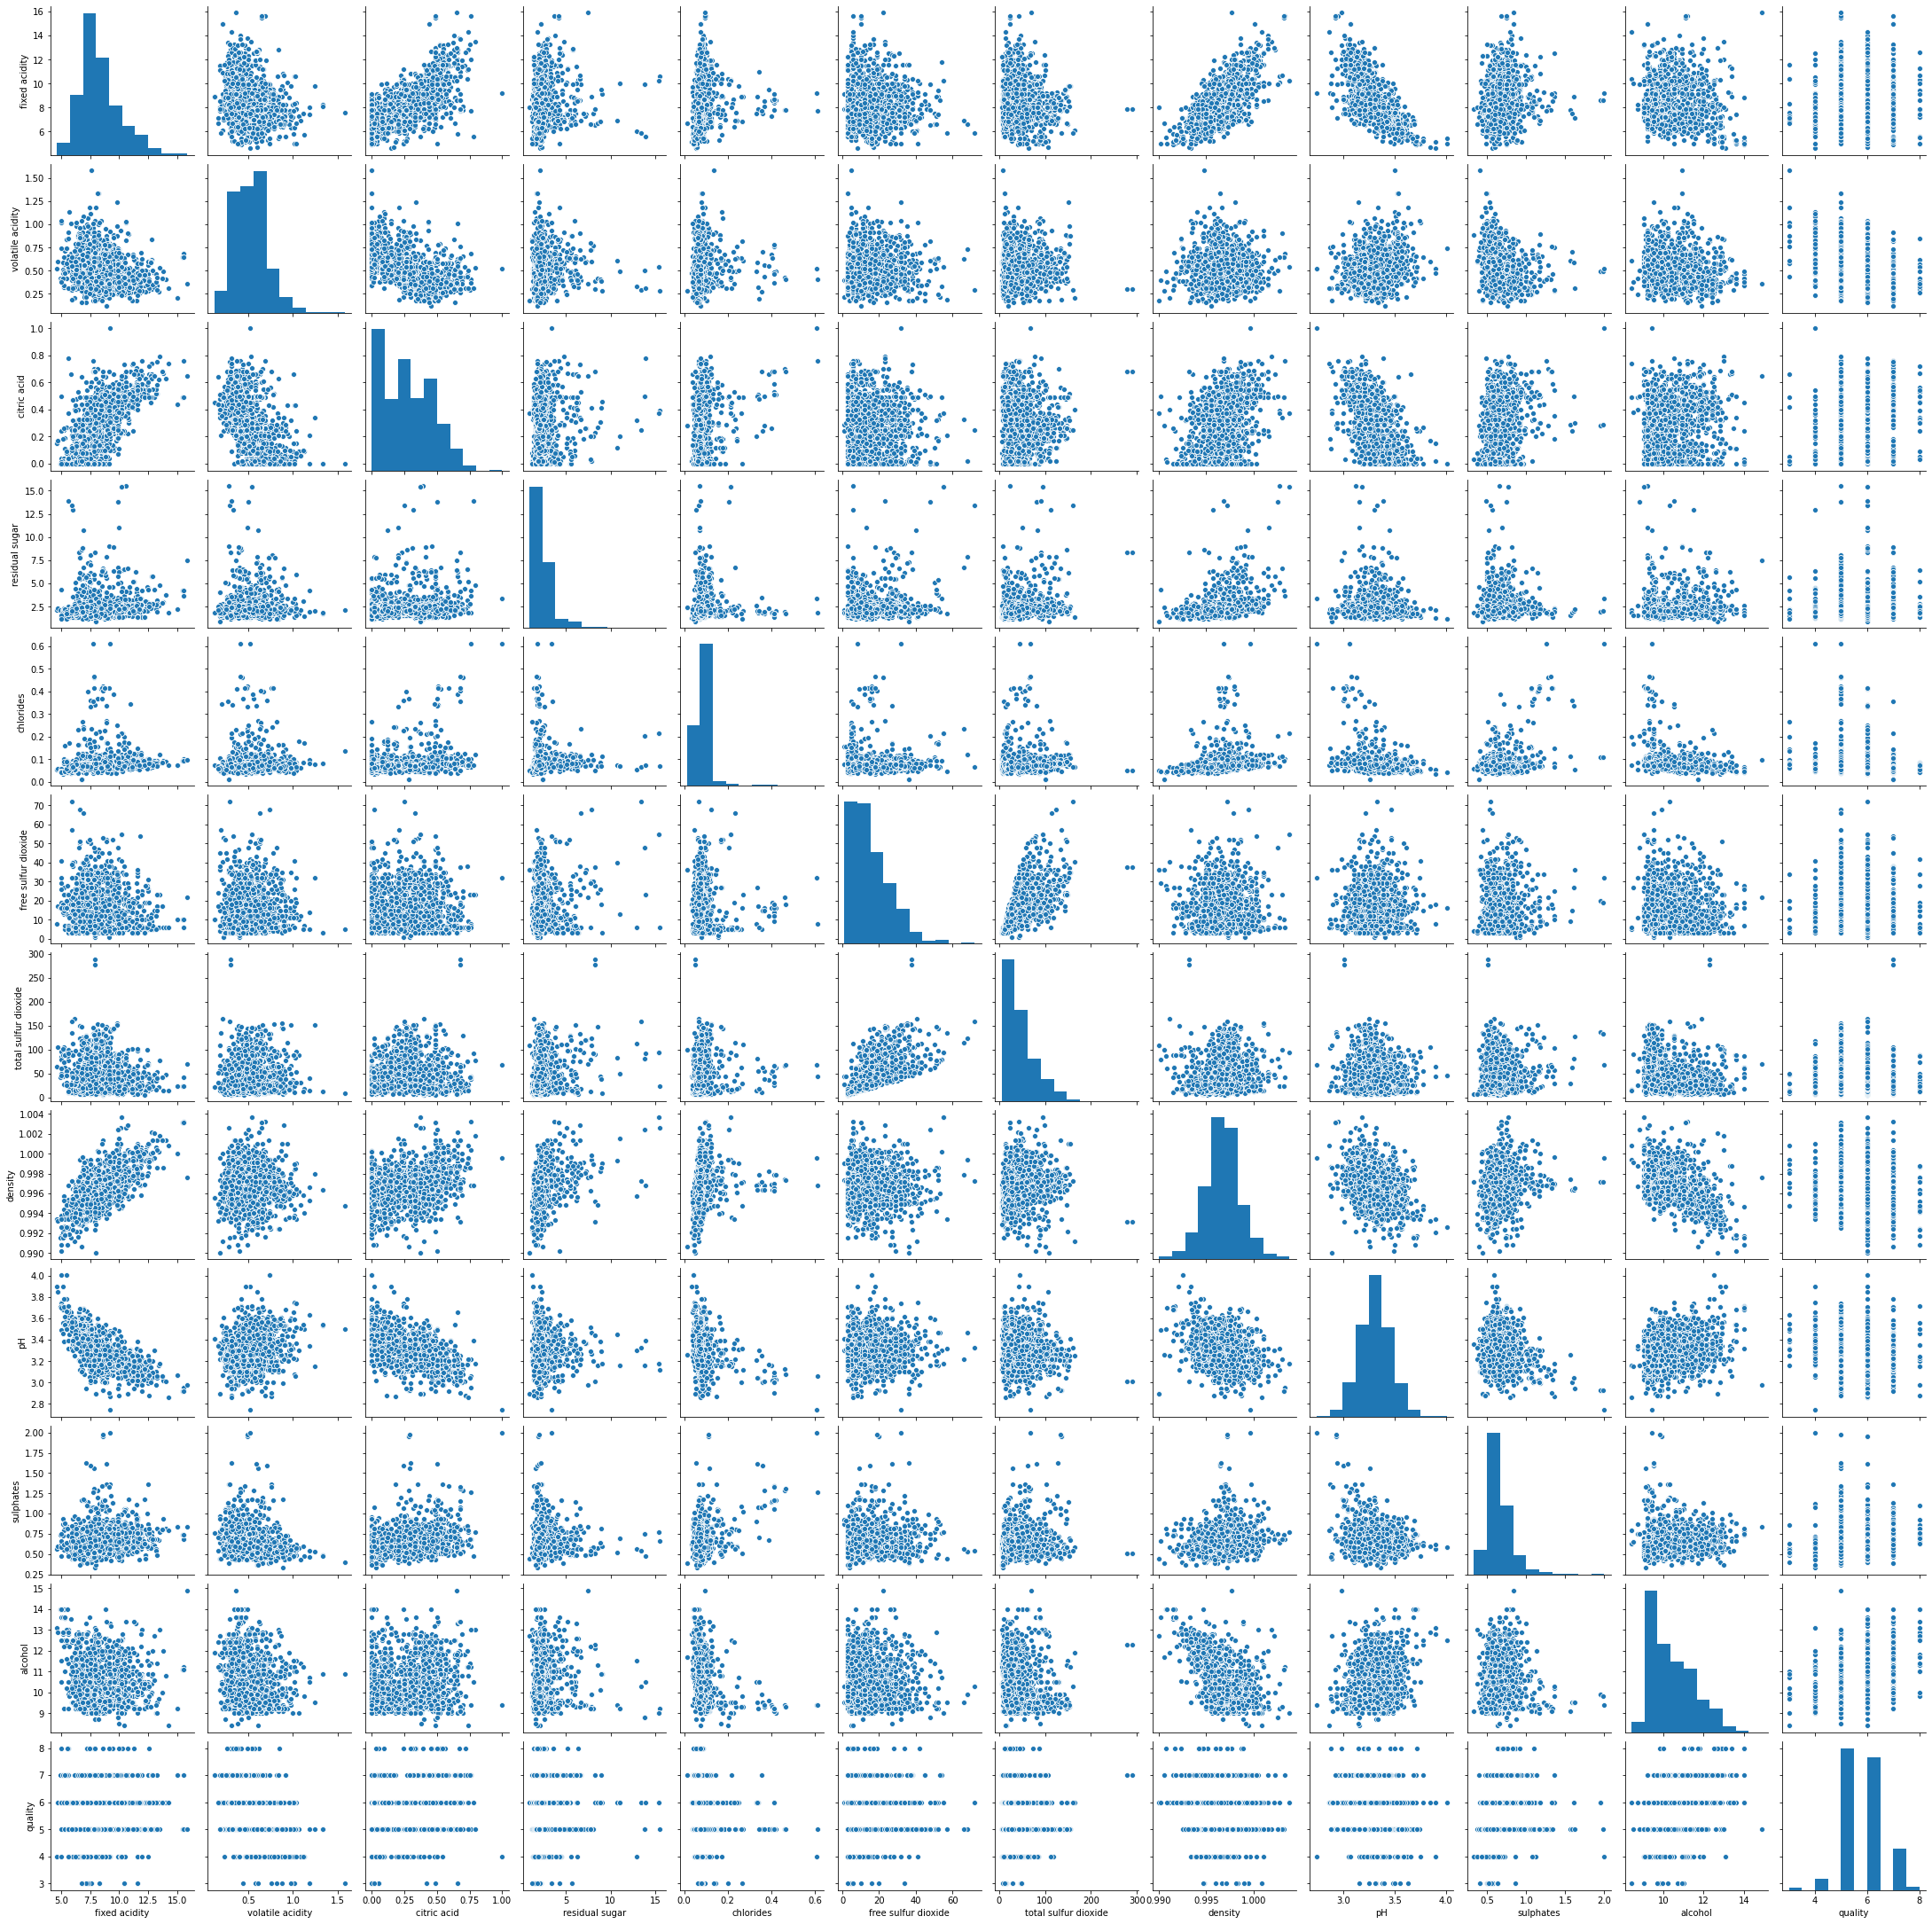

In [37]:
sns.pairplot(wine)

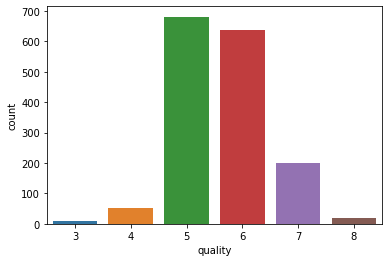

In [34]:
sns.countplot('quality',data=wine)

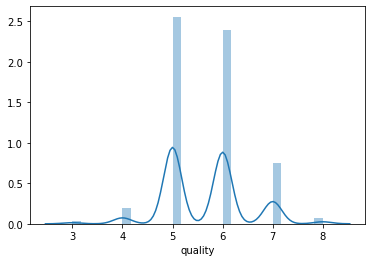

In [39]:
sns.distplot(wine['quality'])

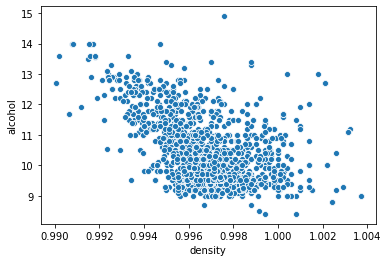

In [40]:
sns.scatterplot(x='density',y='alcohol',data=wine)

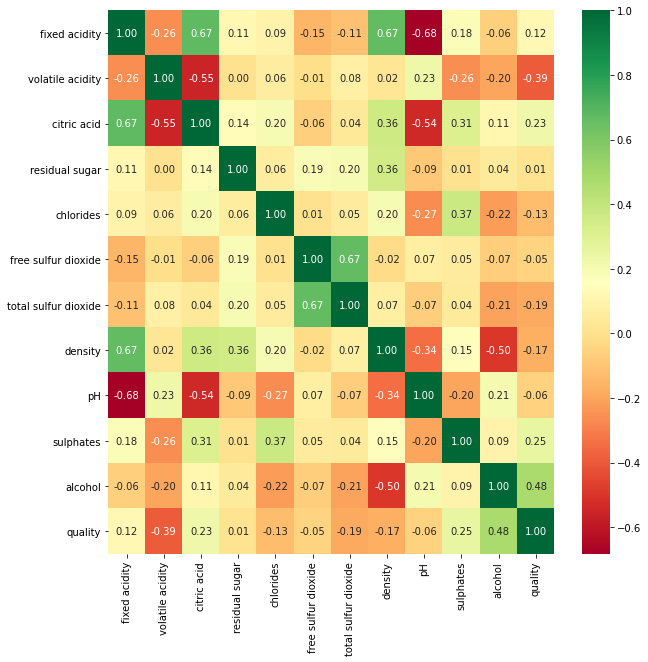

In [41]:
wine_corr = wine.corr()
top_wine_features = wine_corr.index
plt.figure(figsize=(10,10))
sns.heatmap(wine[top_wine_features].corr(),annot=True,cmap='RdYlGn',fmt='.2f')

Separate features and Label

In [42]:
X = wine.drop('quality',axis=1)
Y = wine['quality']
print(X.shape)
print(Y.shape)

(1599, 11)
(1599,)


Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

Build Classification Model

In [0]:
from tpot import TPOTClassifier

In [0]:
tpot = TPOTClassifier(verbosity=3,scoring='accuracy',cv=10,periodic_checkpoint_folder='tpot_mushroom_wine_results.txt',
                      generations=5,population_size=10,max_time_mins=5,max_eval_time_mins=2)

In [49]:
tpot.fit(X_train,y_train)

31 operators have been imported by TPOT.


Created new folder to save periodic pipeline: tpot_mushroom_wine_results.txt
Saving periodic pipeline from pareto front to tpot_mushroom_wine_results.txt/pipeline_gen_1_idx_0_2020.05.10_07-45-08.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 95.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
Generation 1 - Current Pareto front scores:
-1	0.6606975885826771	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=79, KNeighborsClassifier__p=1, KNeighborsClassifier__weights=distance)

_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Generation 2 - Current Pareto front scores:
-1	0.6606975885826771	KNeighborsClassifier(input_ma

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=10,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=2, max_time_mins=5, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder='tpot_mushroom_wine_results.txt',
               population_size=10, random_state=None, scoring='accuracy',
               subsample=1.0, template=None, use_dask=False, verbosity=3,
               warm_start=False)

In [0]:
y_pred = tpot.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'accuracy_score : {accuracy_score(y_test,y_pred)}')

accuracy_score : 0.646875


In [56]:
print(f"TPOT acuuracy : {tpot.score(X_test,y_test)* 100}")

TPOT acuuracy : 64.6875


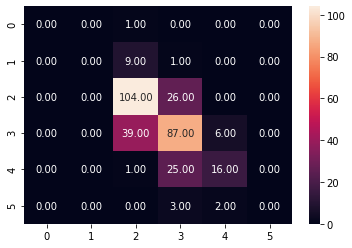

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')